In [1]:
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = r"C:\Users\mshif\capture_40.dat"

# Load the binary file as complex64 (32-bit floats for I and Q)
with open(file_path, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.complex64)  # Read as complex floats

# Reshape into chunks (2048 samples per chunk)
chunks = raw_data.reshape(-1, 2048)  # Shape: [num_chunks, 2048]

# Print basic info
print(f"Total samples: {len(raw_data)}")
print(f"Number of chunks: {len(chunks)}")
print(f"First sample: {raw_data[0]}")  # Print the first sample

# Plot the first chunk
plt.figure()
plt.plot(np.real(chunks[0]), label="I (In-phase)")
plt.plot(np.imag(chunks[0]), label="Q (Quadrature)")
plt.title("First Chunk: Time Domain")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Compute and plot the frequency spectrum of the first chunk
fft_result = np.fft.fft(chunks[200])
freq = np.fft.fftfreq(len(chunks[200]), d=1/24e6)  # 40 MHz sampling rate

plt.figure()
plt.plot(freq / 1e6, 20 * np.log10(np.abs(fft_result)))  # Convert to dB
plt.title("First Chunk: Frequency Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mshif\\capture_40.dat'

256


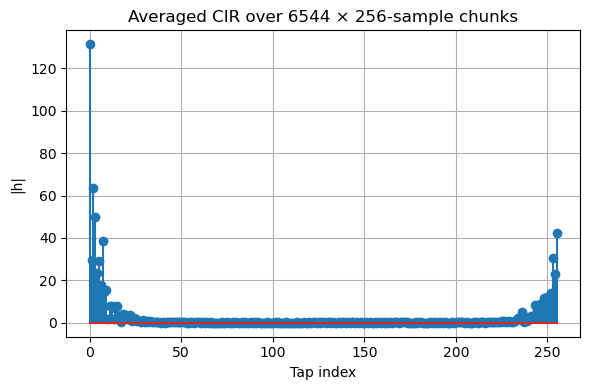

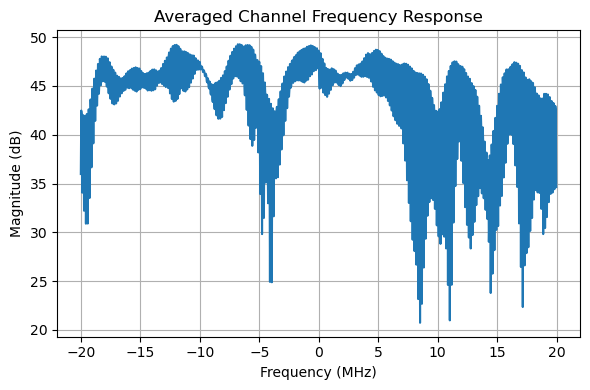

In [2]:
Fs       = 40e6           # 25 MS/s sampling rate
L        = 256            # Zadoff–Chu sequence length

# The 256-point Zadoff–Chu reference (exactly as provided)
zc_ref = np.array([
    1.0+0.0j, 1.0000+0.0000j, 0.9997-0.0246j, 0.9973-0.0739j, 0.9891-0.1473j,
    0.9698-0.2439j, 0.9325-0.3612j, 0.8691-0.4947j, 0.7713-0.6365j, 0.6317-0.7752j,
    0.4457-0.8952j, 0.2139-0.9768j, -0.0554-0.9985j, -0.3439-0.9390j, -0.6221-0.7829j,
    -0.8502-0.5264j, -0.9830-0.1837j, -0.9781+0.2079j, -0.8090+0.5878j, -0.4785+0.8781j,
    -0.0308+0.9995j, 0.4457+0.8952j, 0.8302+0.5575j, 0.9988+0.0493j, 0.8691-0.4947j,
    0.4457-0.8952j, -0.1534-0.9882j, -0.7136-0.7005j, -0.9939-0.1107j, -0.8370+0.5472j,
    -0.2737+0.9618j, 0.4457+0.8952j, 0.9411+0.3382j, 0.9032-0.4291j, 0.3090-0.9511j,
    -0.5000-0.8660j, -0.9830-0.1837j, -0.7634+0.6459j, 0.0431+0.9991j, 0.8302+0.5575j,
    0.9325-0.3612j, 0.2139-0.9768j, -0.7136-0.7005j, -0.9667+0.2558j, -0.2499+0.9683j,
    0.7390+0.6737j, 0.9325-0.3612j, 0.0677-0.9977j, -0.8868-0.4622j, -0.7634+0.6459j,
    0.3324+0.9432j, 1.0000+0.0000j, 0.3090-0.9511j, -0.8233-0.5677j, -0.7634+0.6459j,
    0.4457+0.8952j, 0.9698-0.2439j, -0.0554-0.9985j, -0.9939-0.1107j, -0.2499+0.9683j,
    0.9325+0.3612j, 0.4457-0.8952j, -0.8629-0.5053j, -0.5421+0.8403j, 0.8302+0.5575j,
    0.5524-0.8336j, -0.8502-0.5264j, -0.4785+0.8781j, 0.9135+0.4067j, 0.3090-0.9511j,
    -0.9830-0.1837j, -0.0308+0.9995j, 0.9891-0.1473j, -0.3439-0.9390j, -0.8370+0.5472j,
    0.7390+0.6737j, 0.4457-0.8952j, -0.9872-0.1595j, 0.1656+0.9862j, 0.8691-0.4947j,
    -0.7791-0.6269j, -0.2737+0.9618j, 0.9891-0.1473j, -0.5626-0.8267j, -0.4785+0.8781j,
    1.0000+0.0000j, -0.5000-0.8660j, -0.4785+0.8781j, 0.9973-0.0739j, -0.6221-0.7829j,
    -0.2737+0.9618j, 0.9325-0.3612j, -0.8629-0.5053j, 0.1656+0.9862j, 0.6317-0.7752j,
    -0.9981+0.0616j, 0.7390+0.6737j, -0.0554-0.9985j, -0.6412+0.7674j, 0.9891-0.1473j,
    -0.8502-0.5264j, 0.3324+0.9432j, 0.3090-0.9511j, -0.8090+0.5878j, 0.9997-0.0246j,
    -0.8502-0.5264j, 0.4457+0.8952j, 0.0677-0.9977j, -0.5421+0.8403j, 0.8691-0.4947j,
    -0.9981+0.0616j, 0.9325+0.3612j, -0.7136-0.7005j, 0.4011+0.9160j, -0.0554-0.9985j,
    -0.2737+0.9618j, 0.5524-0.8336j, -0.7634+0.6459j, 0.9032-0.4291j, -0.9781+0.2079j,
    1.0000+0.0000j, -0.9830-0.1837j, 0.9411+0.3382j, -0.8868-0.4622j, 0.8302+0.5575j,
    -0.7791-0.6269j, 0.7390+0.6737j, -0.7136-0.7005j, 0.7049+0.7093j, -0.7136-0.7005j,
    0.7390+0.6737j, -0.7791-0.6269j, 0.8302+0.5575j, -0.8868-0.4622j, 0.9411+0.3382j,
    -0.9830-0.1837j, 1.0000+0.0000j, -0.9781+0.2079j, 0.9032-0.4291j, -0.7634+0.6459j,
    0.5524-0.8336j, -0.2737+0.9618j, -0.0554-0.9985j, 0.4011+0.9160j, -0.7136-0.7005j,
    0.9325+0.3612j, -0.9981+0.0616j, 0.8691-0.4947j, -0.5421+0.8403j, 0.0677-0.9977j,
    0.4457+0.8952j, -0.8502-0.5264j, 0.9997-0.0246j, -0.8090+0.5878j, 0.3090-0.9511j,
    0.3324+0.9432j, -0.8502-0.5264j, 0.9891-0.1473j, -0.6412+0.7674j, -0.0554-0.9985j,
    0.7390+0.6737j, -0.9981+0.0616j, 0.6317-0.7752j, 0.1656+0.9862j, -0.8629-0.5053j,
    0.9325-0.3612j, -0.2737+0.9618j, -0.6221-0.7829j, 0.9973-0.0739j, -0.4785+0.8781j,
    -0.5000-0.8660j, 1.0000+0.0000j, -0.4785+0.8781j, -0.5626-0.8267j, 0.9891-0.1473j,
    -0.2737+0.9618j, -0.7791-0.6269j, 0.8691-0.4947j, 0.1656+0.9862j, -0.9872-0.1595j,
    0.4457-0.8952j, 0.7390+0.6737j, -0.8370+0.5472j, -0.3439-0.9390j, 0.9891-0.1473j,
    -0.0308+0.9995j, -0.9830-0.1837j, 0.3090-0.9511j, 0.9135+0.4067j, -0.4785+0.8781j,
    -0.8502-0.5264j, 0.5524-0.8336j, 0.8302+0.5575j, -0.5421+0.8403j, -0.8629-0.5053j,
    0.4457-0.8952j, 0.9325+0.3612j, -0.2499+0.9683j, -0.9939-0.1107j, -0.0554-0.9985j,
    0.9698-0.2439j, 0.4457+0.8952j, -0.7634+0.6459j, -0.8233-0.5677j, 0.3090-0.9511j,
    1.0000+0.0000j, 0.3324+0.9432j, -0.7634+0.6459j, -0.8868-0.4622j, 0.0677-0.9977j,
    0.9325-0.3612j, 0.7390+0.6737j, -0.2499+0.9683j, -0.9667+0.2558j, -0.7136-0.7005j,
    0.2139-0.9768j, 0.9325-0.3612j, 0.8302+0.5575j, 0.0431+0.9991j, -0.7634+0.6459j,
    -0.9830-0.1837j, -0.5000-0.8660j, 0.3090-0.9511j, 0.9032-0.4291j, 0.9411+0.3382j,
    0.4457+0.8952j, -0.2737+0.9618j, -0.8370+0.5472j, -0.9939-0.1107j, -0.7136-0.7005j,
    -0.1534-0.9882j, 0.4457-0.8952j, 0.8691-0.4947j, 0.9988+0.0493j, 0.8302+0.5575j,
    0.4457+0.8952j, -0.0308+0.9995j, -0.4785+0.8781j, -0.8090+0.5878j, -0.9781+0.2079j,
    -0.9830-0.1837j, -0.8502-0.5264j, -0.6221-0.7829j, -0.3439-0.9390j, -0.0554-0.9985j,
    0.2139-0.9768j, 0.4457-0.8952j, 0.6317-0.7752j, 0.7713-0.6365j, 0.8691-0.4947j,
    0.9325-0.3612j, 0.9698-0.2439j, 0.9891-0.1473j, 0.9973-0.0739j, 0.9997-0.0246j,
    1.0000+0.0000j
], dtype=np.complex64)
print(len(zc_ref))

# Precompute FFT of the reference for circular correlation
ZC_F = np.fft.fft(zc_ref)

# ------------------------------------------------------------------
# 1) LOAD CAPTURE AND SPLIT INTO 256-SAMPLE CHUNKS
# ------------------------------------------------------------------
raw      = raw_data
n_chunks = len(raw) // L
segments = raw[: n_chunks * L].reshape(n_chunks, L)  # shape = [n_chunks, 256]

# ------------------------------------------------------------------
# 2) COHERENT AVERAGING OVER ALL SEGMENTS
# ------------------------------------------------------------------
cir_sum = np.zeros(L, np.complex64)

for seg in segments:
    # Circular correlation via FFT  (length = 256)
    cir = np.fft.ifft(np.fft.fft(seg) * np.conj(ZC_F))

    # Align: roll so the strongest tap is at index 0
    idx = np.argmax(np.abs(cir))
    cir = np.roll(cir, -idx)

    # Phase-rotate so tap 0 is real & positive
    cir *= np.exp(-1j * np.angle(cir[0]))

    cir_sum += cir                       # accumulate

cir_avg = cir_sum / n_chunks             # final averaged CIR

# ------------------------------------------------------------------
# 3) PLOT AVERAGED CIR (TIME DOMAIN)
# ------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.stem(np.abs(cir_avg))
plt.title(f"Averaged CIR over {n_chunks} × 256-sample chunks")
plt.xlabel("Tap index"); plt.ylabel("|h|"); plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 4) PLOT AVERAGED CIR (FREQUENCY RESPONSE)
# ------------------------------------------------------------------
H     = np.fft.fftshift(np.fft.fft(cir_avg, 1024))
f_MHz = np.fft.fftshift(np.fft.fftfreq(H.size, 1/Fs)) / 1e6

plt.figure(figsize=(6, 4))
plt.plot(f_MHz, 20 * np.log10(np.abs(H) + 1e-12))
plt.title("Averaged Channel Frequency Response")
plt.xlabel("Frequency (MHz)"); plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Fs     = 40e6          # 40 MHz
L      = 256           # ZC length
zc_ref = zc_ref        # your 256-point reference array
ZC_F   = np.fft.fft(zc_ref)

# 1) split into 256-sample chunks
raw = raw_data[:len(raw_data)//L*L]
segs = raw.reshape(-1, L)     # shape = (n_chunks, 256)
print(segs.shape)
segs = segs[:100]
print(segs.shape)              # → (100, 256)

(6544, 256)
(100, 256)


C:\Users\mshif\AppData\Local\Temp\ipykernel_25180\1255880919.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4,2))


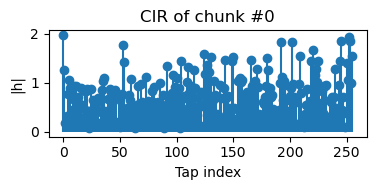

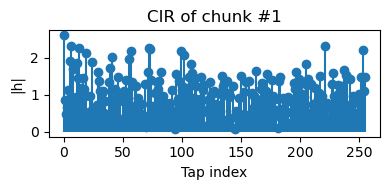

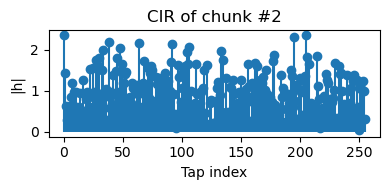

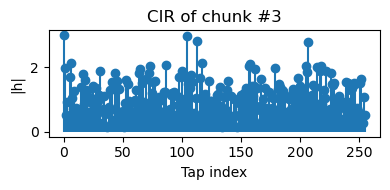

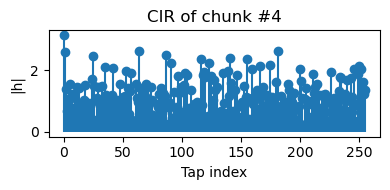

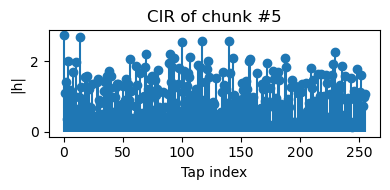

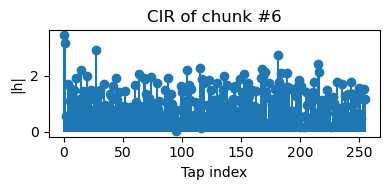

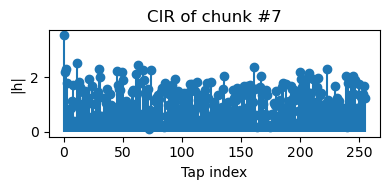

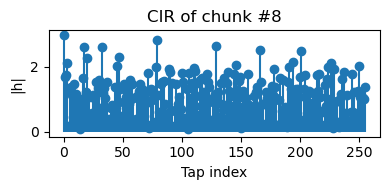

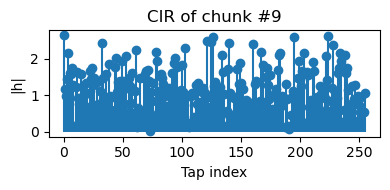

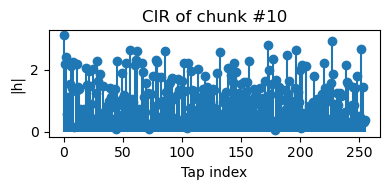

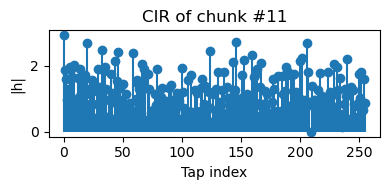

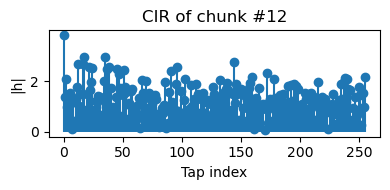

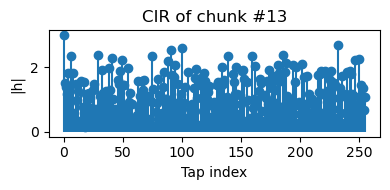

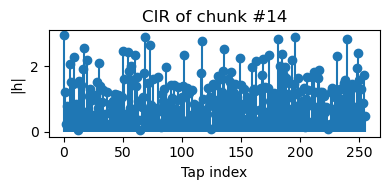

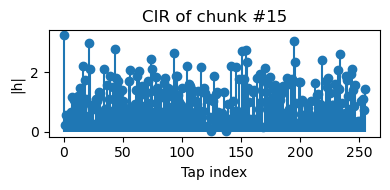

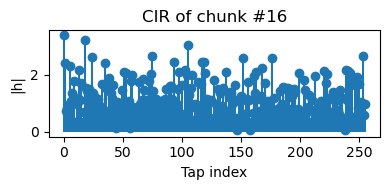

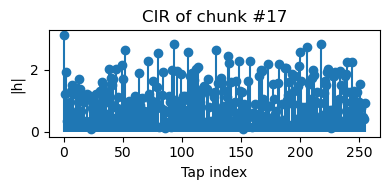

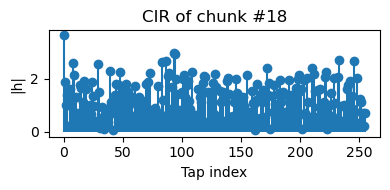

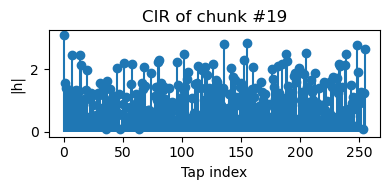

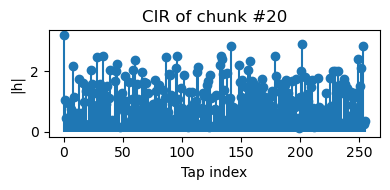

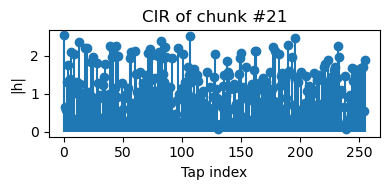

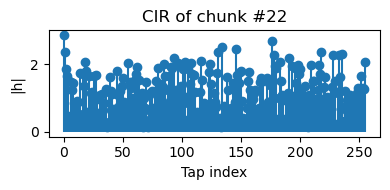

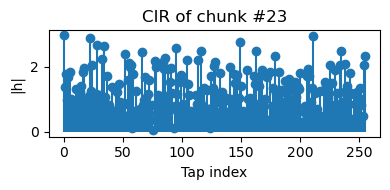

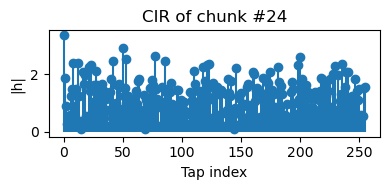

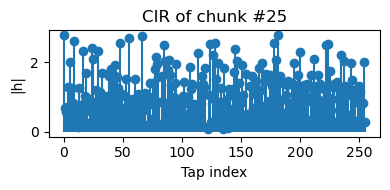

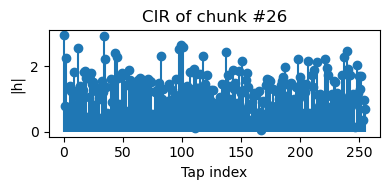

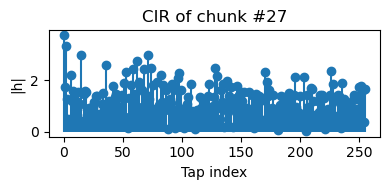

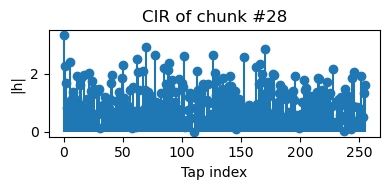

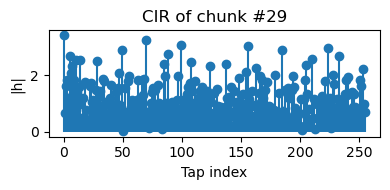

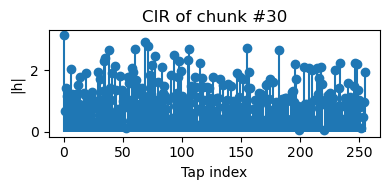

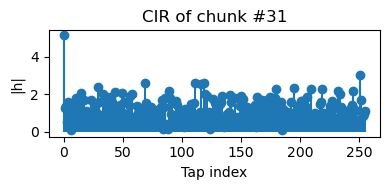

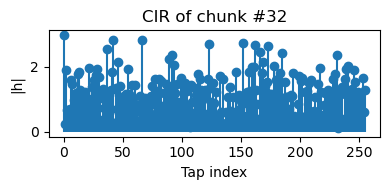

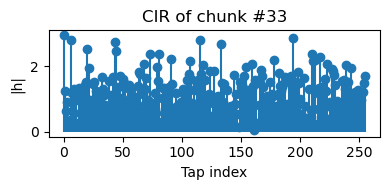

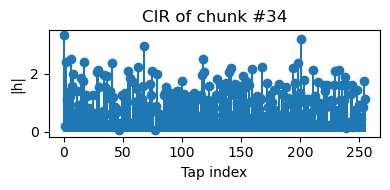

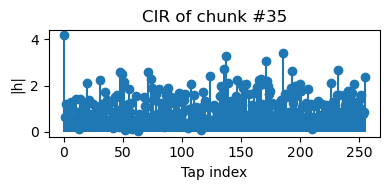

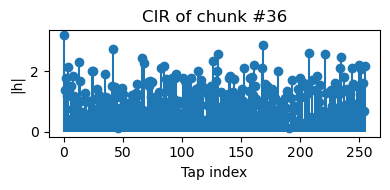

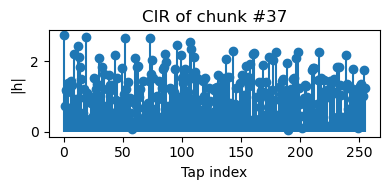

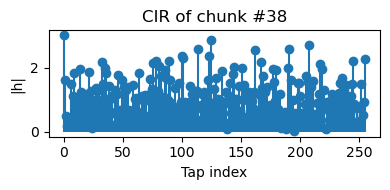

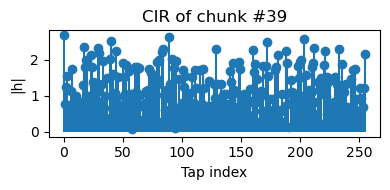

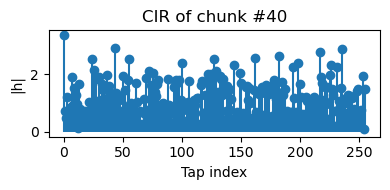

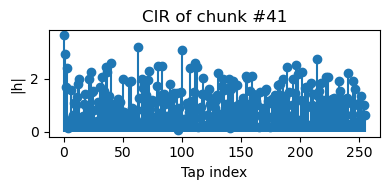

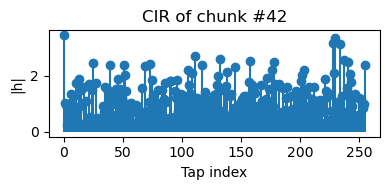

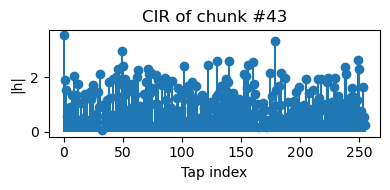

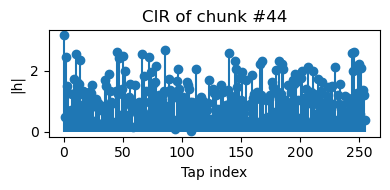

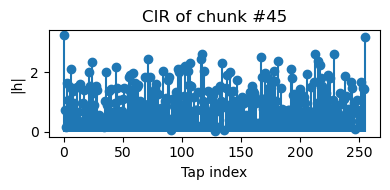

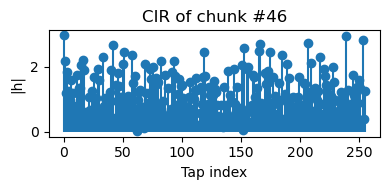

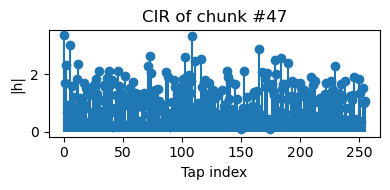

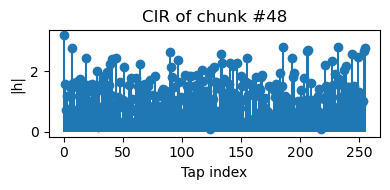

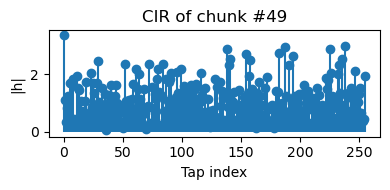

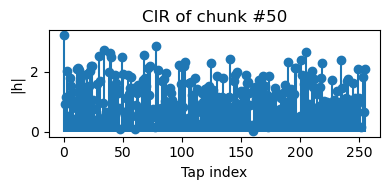

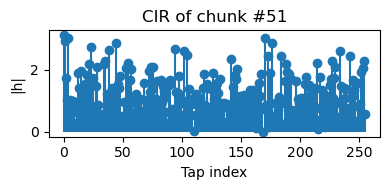

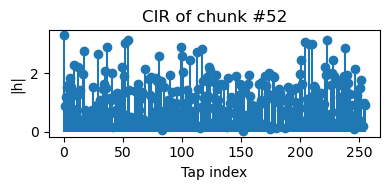

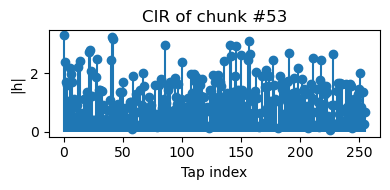

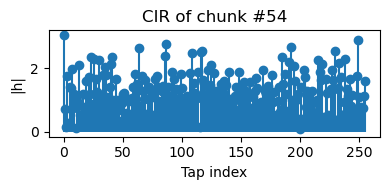

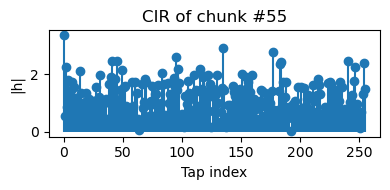

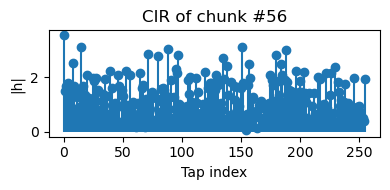

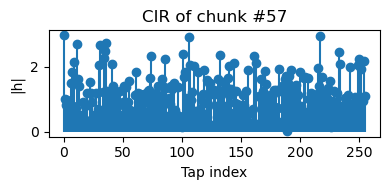

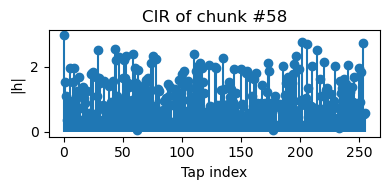

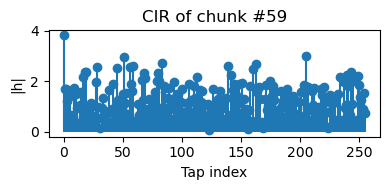

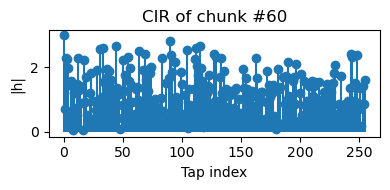

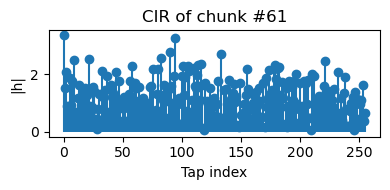

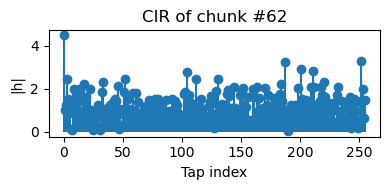

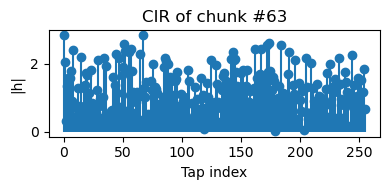

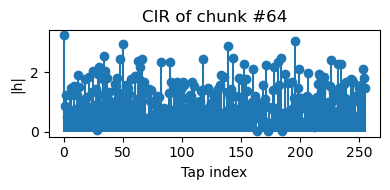

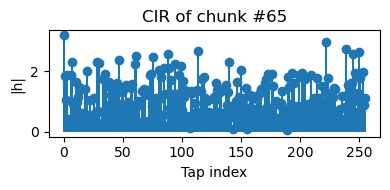

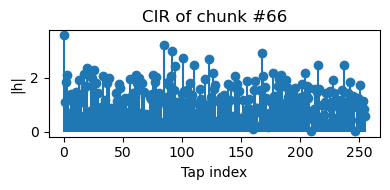

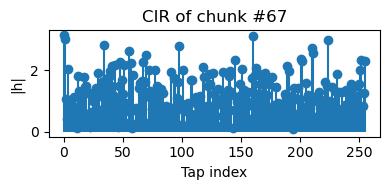

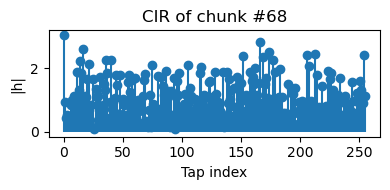

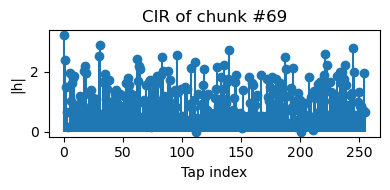

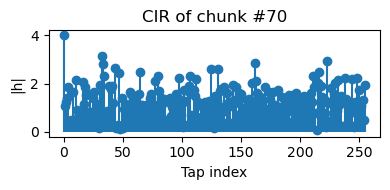

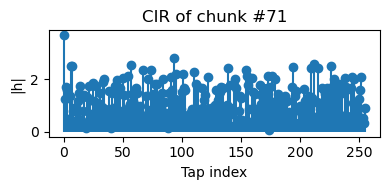

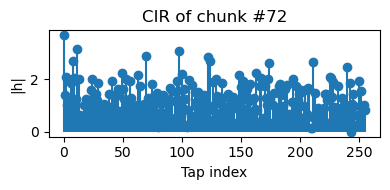

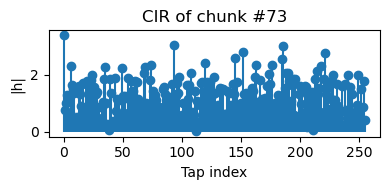

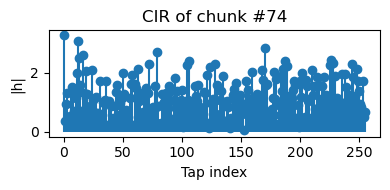

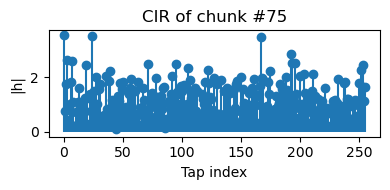

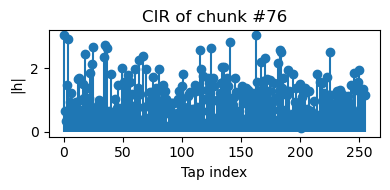

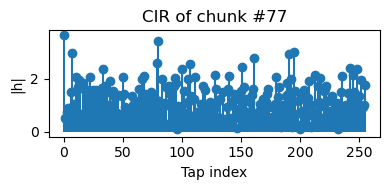

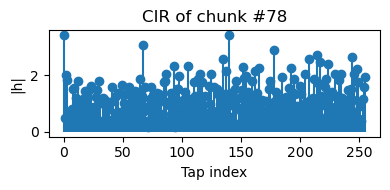

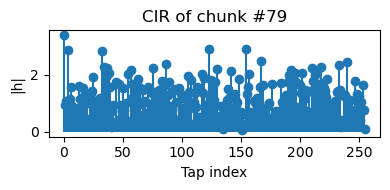

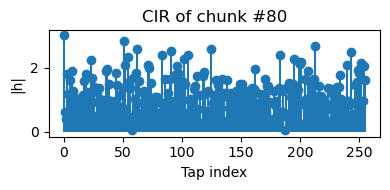

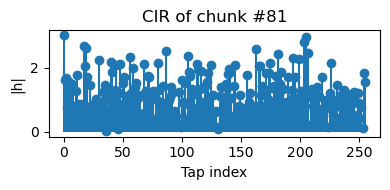

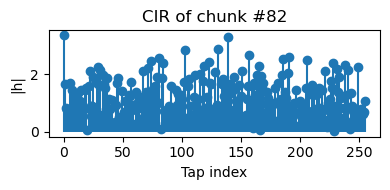

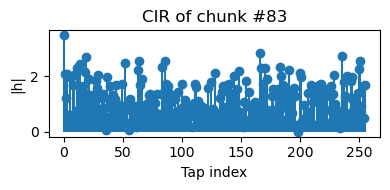

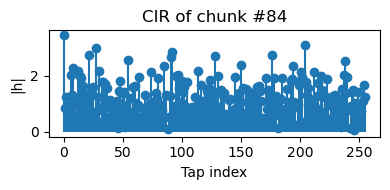

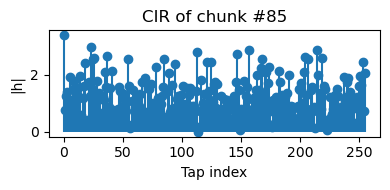

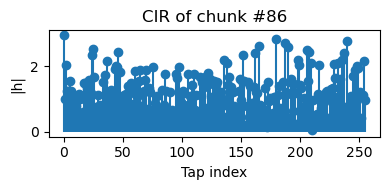

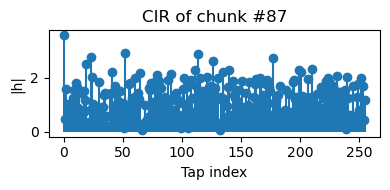

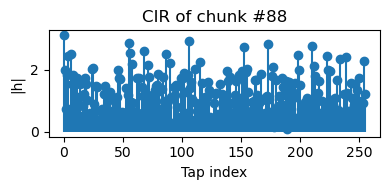

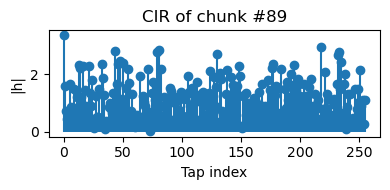

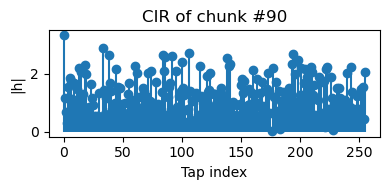

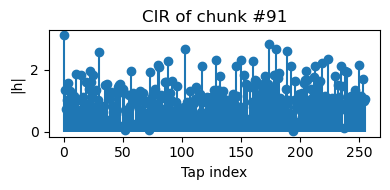

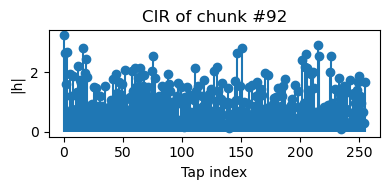

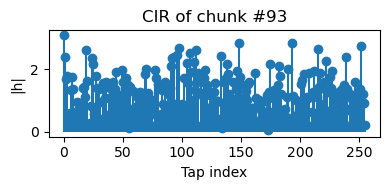

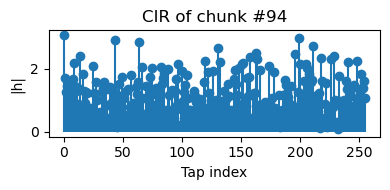

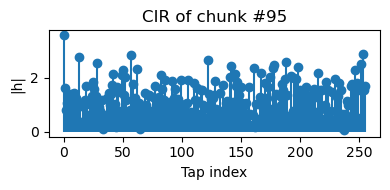

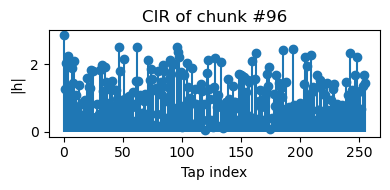

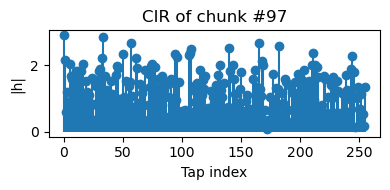

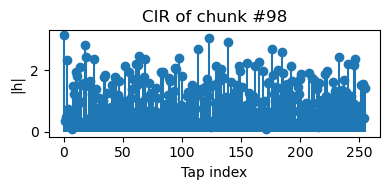

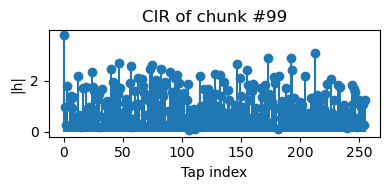

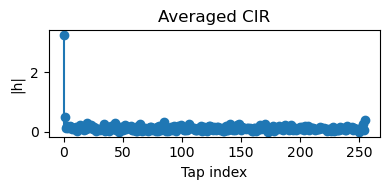

In [5]:
# 2) compute & align CIRs
cirs = []
for seg in segs:
    # circular correlation via FFT
    cir = np.fft.ifft(np.fft.fft(seg) * np.conj(ZC_F))
    # roll so strongest tap is at 0
    cir = np.roll(cir, -np.argmax(np.abs(cir)))
    # rotate phase so tap-0 is real & >0
    cir *= np.exp(-1j*np.angle(cir[0]))
    cirs.append(cir)
cirs = np.vstack(cirs)       # shape = (n_chunks, 256)

# 3) plot each chunk’s CIR
for i, cir in enumerate(cirs):
    plt.figure(figsize=(4,2))
    plt.stem(np.abs(cir), basefmt=" ")
    plt.title(f"CIR of chunk #{i}")
    plt.xlabel("Tap index"); plt.ylabel("|h|")
    plt.tight_layout()

# 4) average and plot
avg_cir = cirs.mean(axis=0)
plt.figure(figsize=(4,2))
plt.stem(np.abs(avg_cir), basefmt=" ")
plt.title("Averaged CIR")
plt.xlabel("Tap index"); plt.ylabel("|h|")
plt.tight_layout()

In [3]:
# Parameters
Fs = 50e6  # Sampling frequency (Hz)
L = 256    # Zadoff-Chu sequence length

# File path
file_path = r"C:\Users\mshif\capture_50.dat"

# Load the binary file as complex64 (32-bit floats for I and Q)
with open(file_path, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.complex64)  # Read as complex floats

# Zadoff-Chu reference sequence (256 points, as provided)
zc_ref = np.array([
    1.0+0.0j, 1.0000+0.0000j, 0.9997-0.0246j, 0.9973-0.0739j, 0.9891-0.1473j,
    0.9698-0.2439j, 0.9325-0.3612j, 0.8691-0.4947j, 0.7713-0.6365j, 0.6317-0.7752j,
    0.4457-0.8952j, 0.2139-0.9768j, -0.0554-0.9985j, -0.3439-0.9390j, -0.6221-0.7829j,
    -0.8502-0.5264j, -0.9830-0.1837j, -0.9781+0.2079j, -0.8090+0.5878j, -0.4785+0.8781j,
    -0.0308+0.9995j, 0.4457+0.8952j, 0.8302+0.5575j, 0.9988+0.0493j, 0.8691-0.4947j,
    0.4457-0.8952j, -0.1534-0.9882j, -0.7136-0.7005j, -0.9939-0.1107j, -0.8370+0.5472j,
    -0.2737+0.9618j, 0.4457+0.8952j, 0.9411+0.3382j, 0.9032-0.4291j, 0.3090-0.9511j,
    -0.5000-0.8660j, -0.9830-0.1837j, -0.7634+0.6459j, 0.0431+0.9991j, 0.8302+0.5575j,
    0.9325-0.3612j, 0.2139-0.9768j, -0.7136-0.7005j, -0.9667+0.2558j, -0.2499+0.9683j,
    0.7390+0.6737j, 0.9325-0.3612j, 0.0677-0.9977j, -0.8868-0.4622j, -0.7634+0.6459j,
    0.3324+0.9432j, 1.0000+0.0000j, 0.3090-0.9511j, -0.8233-0.5677j, -0.7634+0.6459j,
    0.4457+0.8952j, 0.9698-0.2439j, -0.0554-0.9985j, -0.9939-0.1107j, -0.2499+0.9683j,
    0.9325+0.3612j, 0.4457-0.8952j, -0.8629-0.5053j, -0.5421+0.8403j, 0.8302+0.5575j,
    0.5524-0.8336j, -0.8502-0.5264j, -0.4785+0.8781j, 0.9135+0.4067j, 0.3090-0.9511j,
    -0.9830-0.1837j, -0.0308+0.9995j, 0.9891-0.1473j, -0.3439-0.9390j, -0.8370+0.5472j,
    0.7390+0.6737j, 0.4457-0.8952j, -0.9872-0.1595j, 0.1656+0.9862j, 0.8691-0.4947j,
    -0.7791-0.6269j, -0.2737+0.9618j, 0.9891-0.1473j, -0.5626-0.8267j, -0.4785+0.8781j,
    1.0000+0.0000j, -0.5000-0.8660j, -0.4785+0.8781j, 0.9973-0.0739j, -0.6221-0.7829j,
    -0.2737+0.9618j, 0.9325-0.3612j, -0.8629-0.5053j, 0.1656+0.9862j, 0.6317-0.7752j,
    -0.9981+0.0616j, 0.7390+0.6737j, -0.0554-0.9985j, -0.6412+0.7674j, 0.9891-0.1473j,
    -0.8502-0.5264j, 0.3324+0.9432j, 0.3090-0.9511j, -0.8090+0.5878j, 0.9997-0.0246j,
    -0.8502-0.5264j, 0.4457+0.8952j, 0.0677-0.9977j, -0.5421+0.8403j, 0.8691-0.4947j,
    -0.9981+0.0616j, 0.9325+0.3612j, -0.7136-0.7005j, 0.4011+0.9160j, -0.0554-0.9985j,
    -0.2737+0.9618j, 0.5524-0.8336j, -0.7634+0.6459j, 0.9032-0.4291j, -0.9781+0.2079j,
    1.0000+0.0000j, -0.9830-0.1837j, 0.9411+0.3382j, -0.8868-0.4622j, 0.8302+0.5575j,
    -0.7791-0.6269j, 0.7390+0.6737j, -0.7136-0.7005j, 0.7049+0.7093j, -0.7136-0.7005j,
    0.7390+0.6737j, -0.7791-0.6269j, 0.8302+0.5575j, -0.8868-0.4622j, 0.9411+0.3382j,
    -0.9830-0.1837j, 1.0000+0.0000j, -0.9781+0.2079j, 0.9032-0.4291j, -0.7634+0.6459j,
    0.5524-0.8336j, -0.2737+0.9618j, -0.0554-0.9985j, 0.4011+0.9160j, -0.7136-0.7005j,
    0.9325+0.3612j, -0.9981+0.0616j, 0.8691-0.4947j, -0.5421+0.8403j, 0.0677-0.9977j,
    0.4457+0.8952j, -0.8502-0.5264j, 0.9997-0.0246j, -0.8090+0.5878j, 0.3090-0.9511j,
    0.3324+0.9432j, -0.8502-0.5264j, 0.9891-0.1473j, -0.6412+0.7674j, -0.0554-0.9985j,
    0.7390+0.6737j, -0.9981+0.0616j, 0.6317-0.7752j, 0.1656+0.9862j, -0.8629-0.5053j,
    0.9325-0.3612j, -0.2737+0.9618j, -0.6221-0.7829j, 0.9973-0.0739j, -0.4785+0.8781j,
    -0.5000-0.8660j, 1.0000+0.0000j, -0.4785+0.8781j, -0.5626-0.8267j, 0.9891-0.1473j,
    -0.2737+0.9618j, -0.7791-0.6269j, 0.8691-0.4947j, 0.1656+0.9862j, -0.9872-0.1595j,
    0.4457-0.8952j, 0.7390+0.6737j, -0.8370+0.5472j, -0.3439-0.9390j, 0.9891-0.1473j,
    -0.0308+0.9995j, -0.9830-0.1837j, 0.3090-0.9511j, 0.9135+0.4067j, -0.4785+0.8781j,
    -0.8502-0.5264j, 0.5524-0.8336j, 0.8302+0.5575j, -0.5421+0.8403j, -0.8629-0.5053j,
    0.4457-0.8952j, 0.9325+0.3612j, -0.2499+0.9683j, -0.9939-0.1107j, -0.0554-0.9985j,
    0.9698-0.2439j, 0.4457+0.8952j, -0.7634+0.6459j, -0.8233-0.5677j, 0.3090-0.9511j,
    1.0000+0.0000j, 0.3324+0.9432j, -0.7634+0.6459j, -0.8868-0.4622j, 0.0677-0.9977j,
    0.9325-0.3612j, 0.7390+0.6737j, -0.2499+0.9683j, -0.9667+0.2558j, -0.7136-0.7005j,
    0.2139-0.9768j, 0.9325-0.3612j, 0.8302+0.5575j, 0.0431+0.9991j, -0.7634+0.6459j,
    -0.9830-0.1837j, -0.5000-0.8660j, 0.3090-0.9511j, 0.9032-0.4291j, 0.9411+0.3382j,
    0.4457+0.8952j, -0.2737+0.9618j, -0.8370+0.5472j, -0.9939-0.1107j, -0.7136-0.7005j,
    -0.1534-0.9882j, 0.4457-0.8952j, 0.8691-0.4947j, 0.9988+0.0493j, 0.8302+0.5575j,
    0.4457+0.8952j, -0.0308+0.9995j, -0.4785+0.8781j, -0.8090+0.5878j, -0.9781+0.2079j,
    -0.9830-0.1837j, -0.8502-0.5264j, -0.6221-0.7829j, -0.3439-0.9390j, -0.0554-0.9985j,
    0.2139-0.9768j, 0.4457-0.8952j, 0.6317-0.7752j, 0.7713-0.6365j, 0.8691-0.4947j,
    0.9325-0.3612j, 0.9698-0.2439j, 0.9891-0.1473j, 0.9973-0.0739j, 0.9997-0.0246j,
    1.0000+0.0000j
], dtype=np.complex64)

# Precompute FFT of the reference
ZC_F = np.fft.fft(zc_ref)

# Split raw data into 256-sample chunks (assuming raw_data is defined)
raw = raw_data  # Replace with your actual raw data
n_chunks = len(raw) // L
segments = raw[:n_chunks * L].reshape(n_chunks, L)
print(segments.shape)
segment = segments[2000:5000]
print(segment.shape)
n_chunk = 3000

(5896, 256)
(3000, 256)


In [4]:
# Initialize sum for averaging
cir_sum = np.zeros(L, dtype=np.complex64)

# Process each chunk and plot its CIR
for i, seg in enumerate(segment):
    # Compute CIR via circular correlation
    cir = np.fft.ifft(np.fft.fft(seg) * np.conj(ZC_F))
    
    # Align strongest tap to index 0
    idx = np.argmax(np.abs(cir))
    cir = np.roll(cir, -idx)
    
    # Phase-rotate so tap 0 is real and positive
    cir *= np.exp(-1j * np.angle(cir[0]))
    
    # Plot CIR for this chunk
    #plt.figure(figsize=(6, 4))
    #plt.stem(np.abs(cir))
    #plt.title(f"CIR for Chunk {i+1}/{n_chunk}")
    #plt.xlabel("Tap index")
    #plt.ylabel("|h|")
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()
    
    # Accumulate for averaging
    cir_sum += cir

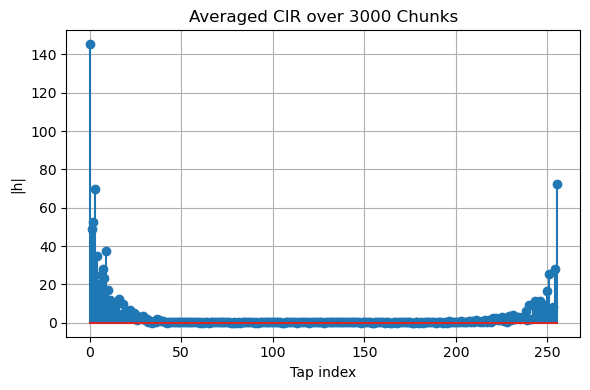

In [5]:
# Compute and plot averaged CIR
cir_avg = cir_sum / n_chunk
plt.figure(figsize=(6, 4))
plt.stem(np.abs(cir_avg))
plt.title(f"Averaged CIR over {n_chunk} Chunks")
plt.xlabel("Tap index")
plt.ylabel("|h|")
plt.grid(True)
plt.tight_layout()
plt.show()

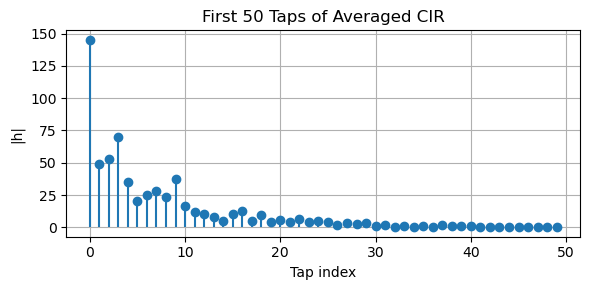

RMS delay spread (first 50 taps): 69.706 ns


In [6]:
# 1) Take first 50 taps
cir50   = cir_avg[:50]        # complex vector of length 50
indices = np.arange(50)       # tap indices 0…49

# 2) Compute RMS delay spread
p       = np.abs(cir50)**2
p      /= p.sum()             # normalize power
delays  = indices * (1/Fs)    # in seconds
mean_t  = np.sum(p * delays)
rms_ds  = np.sqrt(np.sum(p * (delays - mean_t)**2))

# 3) Plot those first 50 taps
plt.figure(figsize=(6,3))
plt.stem(indices, np.abs(cir50), basefmt=" ")
plt.title("First 50 Taps of Averaged CIR")
plt.xlabel("Tap index")
plt.ylabel("|h|")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4) Print delay spread in nanoseconds
print(f"RMS delay spread (first 50 taps): {rms_ds*1e9:.3f} ns")

Normalized CIR (first 50 taps):
[ 7.51663685e-01+8.25621532e-19j  6.06179610e-03-2.54207671e-01j
 -9.54638887e-03+2.72423804e-01j  2.25234225e-01+2.81912059e-01j
  1.64461806e-01+7.61834383e-02j  9.67867076e-02+4.01008427e-02j
  1.21389575e-01-4.02546600e-02j  1.06320798e-01-9.85180736e-02j
 -3.45391780e-03-1.20843485e-01j  1.15059286e-01-1.55387700e-01j
 -3.86476927e-02-7.84334466e-02j -2.98732203e-02-5.51754050e-02j
 -8.15296825e-03-5.34171499e-02j  3.00122704e-02+2.66806595e-02j
 -6.78202778e-04-2.36430373e-02j  2.44507790e-02-4.59810458e-02j
 -1.60327982e-02-6.24871403e-02j -2.14716736e-02-1.21728927e-02j
 -2.41607986e-02-4.43425477e-02j -4.20098472e-03+2.17297152e-02j
  1.16319740e-02-2.78358702e-02j  6.89423177e-04-2.15941258e-02j
  1.75027940e-02-2.89928261e-02j -4.81299777e-03-2.25600861e-02j
  1.38725014e-02-2.26616561e-02j -3.44899669e-03-2.17289682e-02j
  5.81004983e-03-6.42215228e-03j  7.40888296e-03-1.47386640e-02j
  6.14004023e-03+1.01663684e-02j  1.70318782e-02-3.8234845

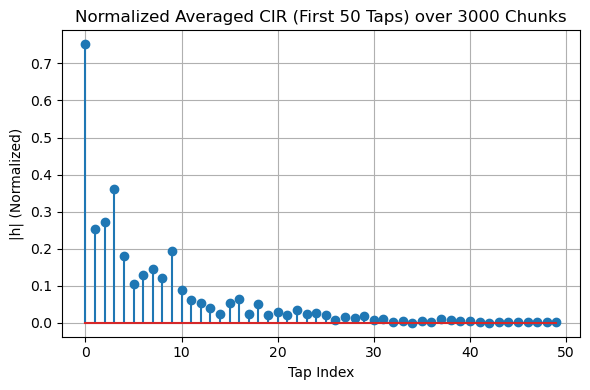

In [8]:
# Normalize power
power = np.sum(np.abs(cir50)**2)
if power == 0:
    print("Error: CIR has zero power, cannot normalize.")
else:
    cir50_normalized = cir50 / np.sqrt(power)
    print("Normalized CIR (first 50 taps):")
    print(cir50_normalized)

# Plot first 50 taps of averaged CIR (optional, for verification)
plt.figure(figsize=(6, 4))
plt.stem(np.abs(cir50_normalized))
plt.title(f"Normalized Averaged CIR (First 50 Taps) over {n_chunk} Chunks")
plt.xlabel("Tap Index")
plt.ylabel("|h| (Normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()

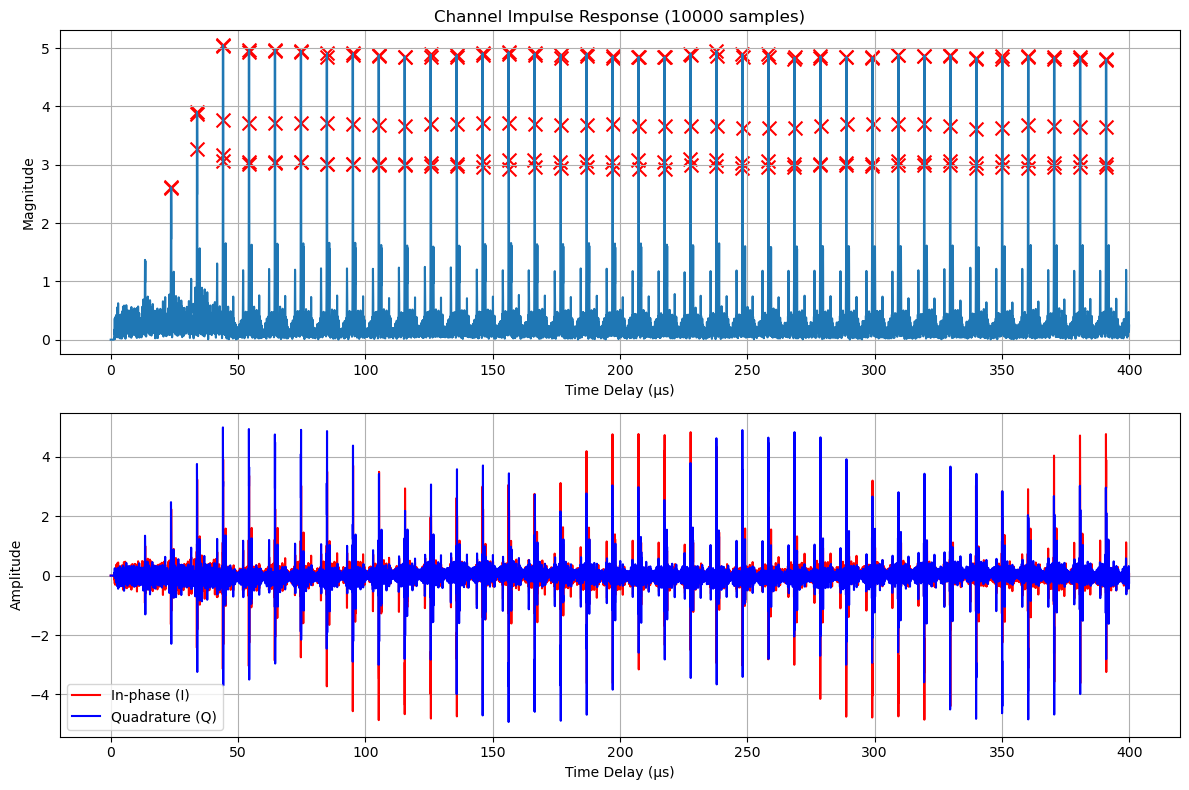

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
filename = r'C:\Users\mshif\CIR.dat'
fs = 25e6  # 10 MHz sampling rate
samples_to_plot = 10000  # First 1000 samples

# Read complex samples
samples = np.fromfile(filename, dtype=np.complex64, count=samples_to_plot)

# Create time axis in microseconds
t = np.arange(len(samples)) * (1/fs) * 1e6  # μs

# Create figure
plt.figure(figsize=(12, 8))

# Plot magnitude with time axis
plt.subplot(2, 1, 1)
plt.plot(t, np.abs(samples))
plt.title(f'Channel Impulse Response ({len(samples)} samples)')
plt.xlabel('Time Delay (μs)')
plt.ylabel('Magnitude')
plt.grid(True)

# Mark significant taps (peaks)
peaks = np.where(np.abs(samples) > 0.5 * np.max(np.abs(samples)))[0]
plt.scatter(t[peaks], np.abs(samples)[peaks], c='red', marker='x', s=100)

# Plot IQ components
plt.subplot(2, 1, 2)
plt.plot(t, samples.real, 'r-', label='In-phase (I)')
plt.plot(t, samples.imag, 'b-', label='Quadrature (Q)')
plt.xlabel('Time Delay (μs)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
from pathlib import Path
from scipy.signal import correlate, find_peaks

h = np.fromfile(Path(r"C:\Users\mshif\CIR.dat"), dtype=np.complex64)
mag = np.abs(h)

# crude autocorrelation on a short excerpt
R = correlate(mag[:5000], mag[:5000], mode="full")
lags = np.arange(-len(mag[:5000])+1, len(mag[:5000]))

# find positive-lag peaks (ignore the huge zero-lag peak)
peaks, _ = find_peaks(R[len(R)//2+1:], height=0.3*R.max())
period = lags[len(R)//2+1:][peaks][0]     # first positive peak → period
print("Detected repeating period:", period, "samples")


Detected repeating period: 4 samples


Peak sample index in 'samples': 825
Value at chunk[0]: -1.1550-0.7215j, magnitude = 1.3618


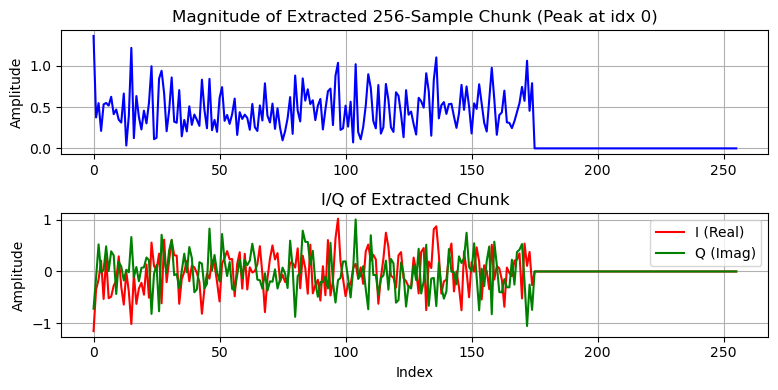

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Read the first 1000 complex samples
samples = np.fromfile(r'C:\Users\mshif\CIR.dat', dtype=np.complex64, count=1000)

# 1) Find the index of the largest-magnitude sample (peak)
peak_idx = np.argmax(np.abs(samples))

# 2) Extract a 256-sample chunk starting at the peak, so the peak is at index 0 of the chunk
chunk_len = 256
if peak_idx + chunk_len <= samples.size:
    chunk = samples[peak_idx : peak_idx + chunk_len]
else:
    # If the peak is too close to the end, pad with zeros to reach 256 samples
    needed = (peak_idx + chunk_len) - samples.size
    chunk = np.concatenate((samples[peak_idx : ], np.zeros(needed, dtype=np.complex64)))

# 3) Verify that chunk[0] is indeed the peak
#    (optional printout for sanity check)
print(f"Peak sample index in 'samples': {peak_idx}")
print(f"Value at chunk[0]: {chunk[0]:.4f}, magnitude = {abs(chunk[0]):.4f}")

# 4) (Optional) Plot the extracted chunk
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(np.abs(chunk), 'b-')
plt.title('Magnitude of Extracted 256-Sample Chunk (Peak at idx 0)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(chunk.real, 'r-', label='I (Real)')
plt.plot(chunk.imag, 'g-', label='Q (Imag)')
plt.title('I/Q of Extracted Chunk')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


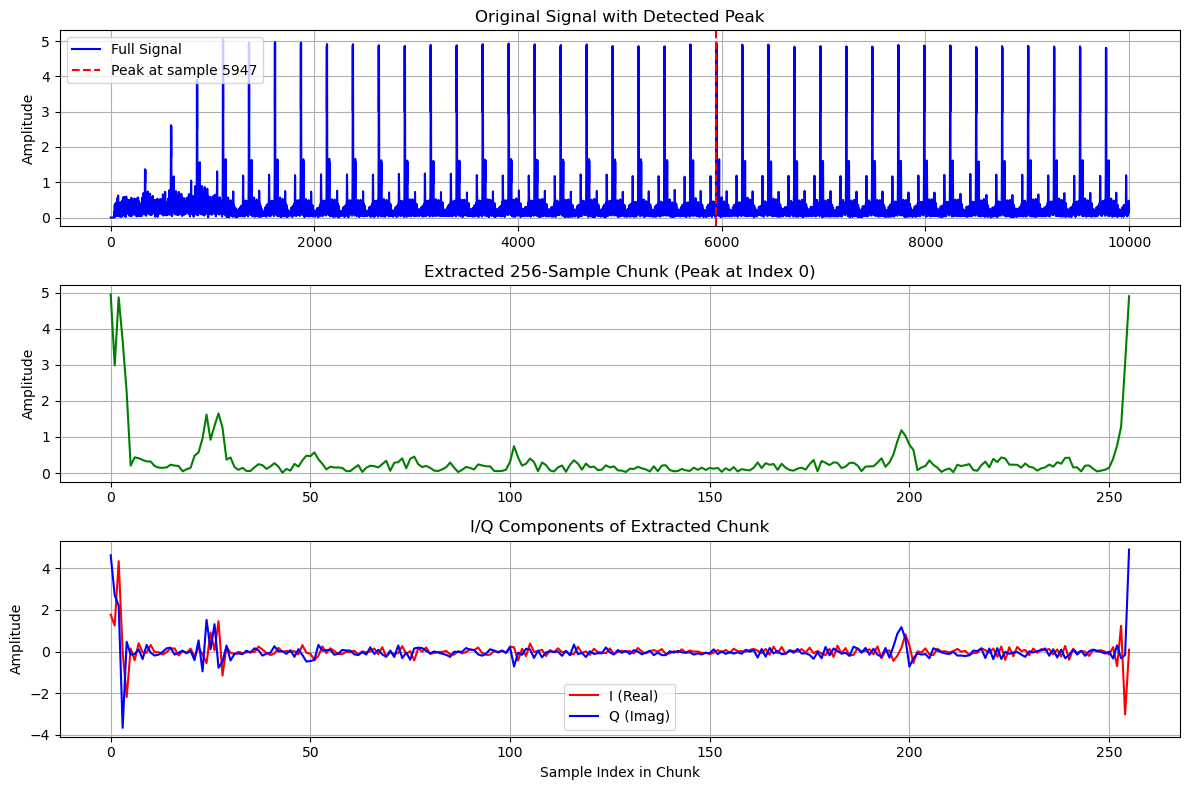

Peak found at absolute sample index: 5947
Extracted chunk range: 5947 to 6203
First sample in chunk magnitude: 4.948882102966309
Peak sample magnitude: 4.948882102966309


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Read first 1000 complex samples
samples = np.fromfile(r'C:\Users\mshif\CIR.dat', dtype=np.complex64, count=10000)

# Find peak in the middle section (avoid edges)
mid_start = len(samples) // 4  # Start at 25% of samples
mid_end = 3 * len(samples) // 4  # End at 75% of samples
mid_samples = samples[mid_start:mid_end]
peak_idx_mid = np.argmax(np.abs(mid_samples)) + mid_start

# Extract 256-sample chunk with peak at index 0
chunk_start = peak_idx_mid
chunk_end = peak_idx_mid + 256
cir_chunk = samples[chunk_start:chunk_end]

# Create figure with three subplots
plt.figure(figsize=(12, 8))

# Plot original signal with peak marker
plt.subplot(3, 1, 1)
plt.plot(np.abs(samples), 'b-', label='Full Signal')
plt.axvline(x=peak_idx_mid, color='r', linestyle='--', 
           label=f'Peak at sample {peak_idx_mid}')
plt.title('Original Signal with Detected Peak')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot extracted chunk with peak at index 0
plt.subplot(3, 1, 2)
plt.plot(np.abs(cir_chunk), 'g-')
plt.title('Extracted 256-Sample Chunk (Peak at Index 0)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot I/Q components of chunk
plt.subplot(3, 1, 3)
plt.plot(cir_chunk.real, 'r-', label='I (Real)')
plt.plot(cir_chunk.imag, 'b-', label='Q (Imag)')
plt.title('I/Q Components of Extracted Chunk')
plt.xlabel('Sample Index in Chunk')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print chunk information
print(f"Peak found at absolute sample index: {peak_idx_mid}")
print(f"Extracted chunk range: {chunk_start} to {chunk_end}")
print(f"First sample in chunk magnitude: {np.abs(cir_chunk[0])}")
print(f"Peak sample magnitude: {np.abs(samples[peak_idx_mid])}")